### Задача 1

Дана матрица объект-признак

X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]

и значения целевой переменной

y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]

    Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
    Является ли значимым получившееся уравнение регрессии?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
x0 = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
               [-0.18757272, 1.30337355, 5.12093014, 3.46363202],
               [-0.81094525, 1.82463398, 5.79686488, 1.86159445],
               [ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
               [ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
               [-0.62972637, 0.77750764, 2.84124027, 4.54410559],
               [ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
               [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
               [ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
               [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108, 7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [3]:
x0

array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
       [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
       [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
       [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
       [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
       [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
       [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
       [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
       [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
       [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

In [4]:
def best_result(x:np.ndarray,y:np.ndarray):
    leng = x.shape[0]
    ones = np.ones((leng, 1))
    x = np.hstack([ones, x])
    XTX = x.T.dot(x)
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(x.T).dot(y)
    z = x.dot(b)
    e2 = y - z
    return 1-e2.var()/y.var()


In [5]:
from itertools import combinations 


In [6]:
for i,j in combinations(range(x0.shape[1]),2):
    r = best_result(x0[:,[i,j]], y)
    print(f'{i+1} {j+1} {r}')

1 2 0.18113594742585204
1 3 0.7634246238793152
1 4 0.45329667831440745
2 3 0.5479482734039011
2 4 0.6062055761129932
3 4 0.6224419876505322


In [8]:
n = x0.shape[0] 
k1 = 2 
k2 = n - 2 - 1
alpha = 0.05
R = best_result(x0[:, [0,2]], y)
F = (R/k1)/((1-R)/k2)

In [9]:
t = stats.f.ppf(1 - alpha, k1, k2)
F = (R / k1) / ((1 - R) / k2)
print(f'{t}-oo, {F} - находится в критической области.')

4.73741412777588-oo, 11.29443912292265 - находится в критической области.


Данные не значимы, т.к. F больше t (попала в критическую область)

## Задача 2

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

In [10]:
y = np.zeros(2509)
y[np.arange(77)] = 1
n = len(y)
y_mean = y.mean()

y1 = np.zeros(1465)
y1[np.arange(60)] = 1
y1_mean = np.mean(y1)
n1 = len(y1)

y, n, y_mean, y1, n1, y1_mean

(array([1., 1., 1., ..., 0., 0., 0.]),
 2509,
 0.03068951773614986,
 array([1., 1., 1., ..., 0., 0., 0.]),
 1465,
 0.040955631399317405)

In [11]:
y0 = np.concatenate([y, y1])
n0 = len(y0)
y0_mean = y0.mean()
y0, n0, y0_mean

(array([1., 1., 1., ..., 0., 0., 0.]), 3974, 0.03447408152994464)

In [12]:
SS_b = n * (y_mean - y0_mean) ** 2 + n1 * (y1_mean - y0_mean) ** 2

SS_w = ((y - y_mean) ** 2).sum() + ((y1 - y1_mean) ** 2).sum()

SS_b, SS_w

(0.09748158004016791, 132.17956925035745)

In [13]:
k = 2
k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.05272419994031011)

In [14]:
F = sigma2_b / sigma2_w
F

1.8488963350895478

In [15]:
from scipy import stats

In [16]:
alpha = 0.05
t = stats.f.ppf(1-alpha, k1, k2)
print(t, '- oo')

3.8451707449430548 - oo


Значение не попало в критичускую область.

### Задача 3
Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{ "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68], "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74], "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73], "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0], "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89] }

По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.


In [17]:
data = {"x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68], "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74], "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73], "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0], "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]}


In [18]:
np.mean(data['x1']), np.mean(data['x2']), np.mean(data['x3']), np.mean(data['x4'])

(9.0, 9.0, 9.0, 9.0)

In [19]:
np.mean(data['y1']), np.mean(data['y2']), np.mean(data['y3']), np.mean(data['y4'])

(7.500909090909093, 7.50090909090909, 7.5, 7.500909090909091)

In [20]:
np.var(data['x1'], ddof = 1), np.var(data['x2'], ddof = 1), np.var(data['x3'], ddof = 1), np.var(data['x4'], ddof = 1)


(11.0, 11.0, 11.0, 11.0)

In [21]:
np.var(data['y1'], ddof = 1), np.var(data['y2'], ddof = 1), np.var(data['y3'], ddof = 1), np.var(data['y4'], ddof = 1)

(4.127269090909091, 4.127629090909091, 4.12262, 4.123249090909091)

In [22]:
np.corrcoef(data['x1'], data['y1'])[0,1]

0.81642051634484

In [23]:
np.corrcoef(data['x2'], data['y2'])[0,1]

0.8162365060002428

In [24]:
np.corrcoef(data['x3'], data['y3'])[0,1]

0.8162867394895984

In [25]:
np.corrcoef(data['x4'], data['y4'])[0,1]

0.8165214368885028

In [26]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - np.mean(samples)) ** 2).sum()

In [27]:
cov1 = np.cov(data['x1'], data['y1'], ddof = 1)[1,0]/np.var(data['x1'], ddof = 1)
lr1 = np.mean(data['y1']) - cov1*(np.mean(data['x1']))
cov1, lr1
cov2 = np.cov(data['x2'], data['y2'], ddof = 1)[1,0]/np.var(data['x2'], ddof = 1)
lr2 = np.mean(data['y2']) - cov2*(np.mean(data['x2']))
cov2, lr2
cov3 = np.cov(data['x3'], data['y3'], ddof = 1)[1,0]/np.var(data['x3'], ddof = 1)
lr3 = np.mean(data['y3']) - cov3*(np.mean(data['x3']))
cov3, lr3
cov4 = np.cov(data['x4'], data['y4'], ddof = 1)[1,0]/np.var(data['x4'], ddof = 1)
lr4 = np.mean(data['y4']) - cov4*(np.mean(data['x4']))
print(cov1, lr1, '\n' , cov2, lr2, '\n' ,cov3, lr3, '\n' ,cov4, lr4)

0.5000909090909093 3.0000909090909094 
 0.5000000000000001 3.000909090909089 
 0.49972727272727285 3.002454545454544 
 0.49990909090909086 3.0017272727272735


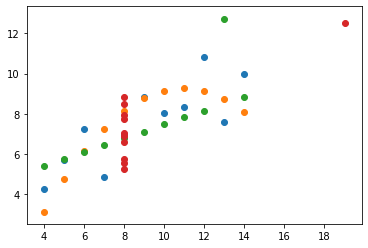

In [28]:
plt.scatter(data['x1'],data['y1'])
plt.scatter(data['x2'],data['y2'])
plt.scatter(data['x3'],data['y3'])
plt.scatter(data['x4'],data['y4'])


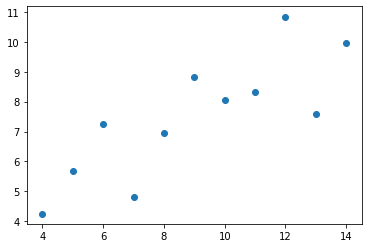

In [29]:
plt.scatter(data['x1'],data['y1'])


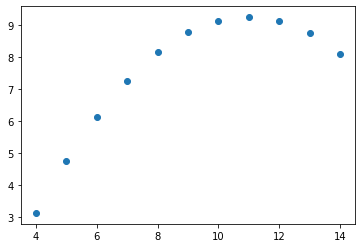

In [30]:
plt.scatter(data['x2'],data['y2'])


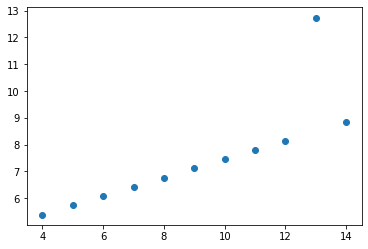

In [31]:
plt.scatter(data['x3'],data['y3'])


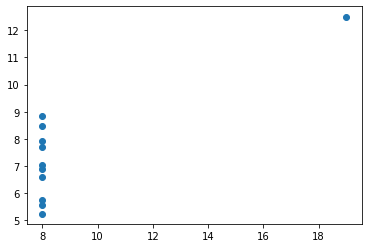

In [32]:
plt.scatter(data['x4'],data['y4'])
